In [ ]:
!pip install scikit-learn
from sklearn.datasets import fetch_california_housing
import pandas as pd 
housing = fetch_california_housing(as_frame=True) 
df = housing.frame 

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
print(df.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [13]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
#check duplicate
print(df.duplicated().sum())

0


In [21]:
# if duplicate
df=df.drop_duplicates()

In [24]:
#missing value
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [40]:
#fill missing value with mean
df=df.fillna(df.mean())

In [45]:
# new column
df['PricePerRoom']=df['MedHouseVal']/df['AveRooms']
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PricePerRoom,highpopulationarea
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.648041,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.574691,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.424824,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.586693,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.544744,1


In [46]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'PricePerRoom',
       'highpopulationarea'],
      dtype='object')


In [47]:
# column highpopulationarea
df['highpopulationarea']=(df['Population']>500).astype(int)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PricePerRoom,highpopulationarea
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.648041,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.574691,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.424824,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.586693,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.544744,1


In [49]:
#bin median income into 5 categories
df['incomecategoty']=pd.cut(df['MedInc'],bins=5,labels=['very low','low','medium','high','veryhigh'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PricePerRoom,highpopulationarea,incomecategoty
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.648041,0,medium
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.574691,1,medium
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.424824,0,medium
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.586693,1,low
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.544744,1,low


In [50]:
#drop redundant columns

_IncompleteInputError: incomplete input (658847367.py, line 2)

In [54]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


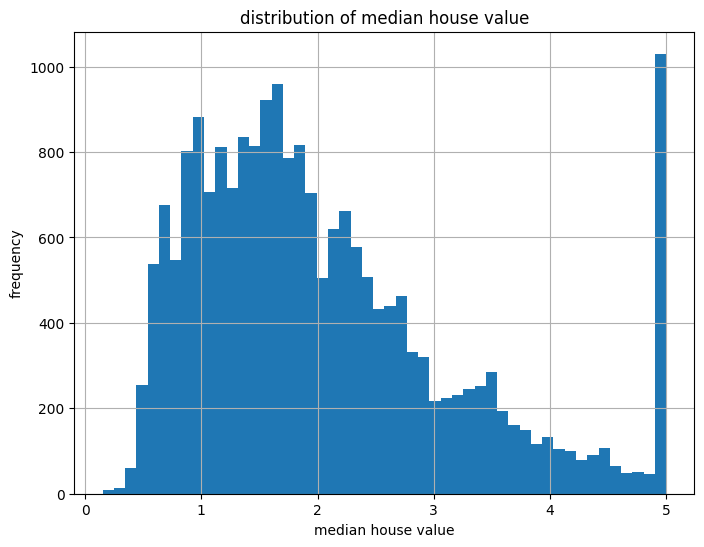

In [56]:
plt.figure(figsize=(8,6))
df['MedHouseVal'].hist(bins=50)
plt.xlabel('median house value')
plt.ylabel('frequency')
plt.title('distribution of median house value')
plt.show()

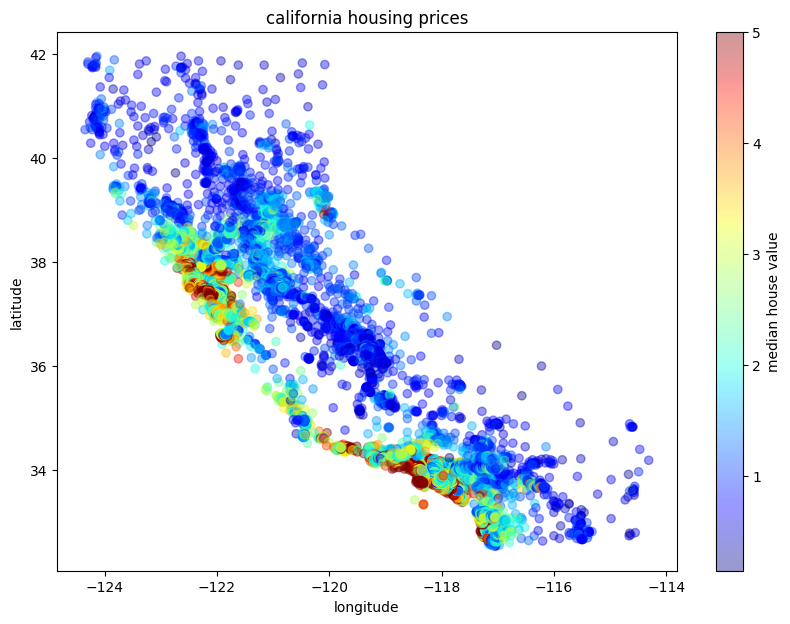

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(df['Longitude'],df['Latitude'],c=df['MedHouseVal'],cmap='jet',alpha=0.4)
plt.colorbar(label='median house value')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('california housing prices')
plt.show()

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income_cat',y='MedHouseVal',data=df)
plt.xlabel('income category')
plt.ylabel('median house value')
plt.title('median house value by income category')
plt.show()

ValueError: Could not interpret value `income_cat` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [61]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=true,cmap='coolwarm')
plt.title('correlation matrix heatmap')
plt.show()

ValueError: could not convert string to float: 'medium'

<Figure size 1200x800 with 0 Axes>

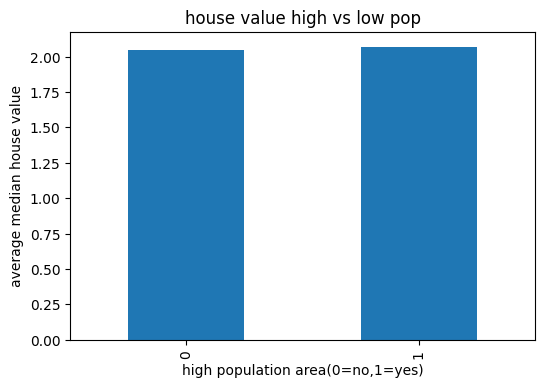

In [62]:
plt.figure(figsize=(6,4))
df.groupby('highpopulationarea')['MedHouseVal'].mean().plot(kind='bar')
plt.xlabel('high population area(0=no,1=yes)')
plt.ylabel('average median house value')
plt.title('house value high vs low pop')
plt.show()